In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1 | Importing Dataset

In [93]:
data = pd.read_csv("datasets/train.csv")

In [94]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Step 2 | Data Information

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [96]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [72]:
data = data.drop(columns=['Unnamed: 0', 'id'])

The column corresponding to the Arrival Delay in Minutes feature has 310 missing values.
Fill missing values with the median of the 'Arrival Delay in Minutes' column.

In [97]:
median_delay = data['Arrival Delay in Minutes'].median()


In [98]:
data['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

In [99]:
data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [100]:
data.shape

(103904, 25)

Now we need to transform the categorical columns in to numerical ones, with the label encoder from scikit-learn

In [101]:
label_encoder = LabelEncoder()
data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
data['Class'] = label_encoder.fit_transform(data['Class'])

In [102]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Also we need to transfom the gender, but with a map to be sure who is Male and who is Female

In [103]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [104]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


And for the last column, the satisfaction we will do the same

In [105]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [106]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# Step 3 | Data Visualization

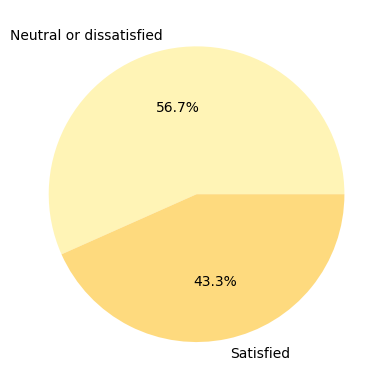

In [107]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Now we will see the correlation between our columns

In [108]:
corr_mat = data.corr()
corr_mat

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,1.000000,0.002991,0.003978,-0.002844,0.004786,0.000856,-0.001134,0.002794,-0.002490,0.000739,...,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000063,-0.004731
id,0.002991,1.000000,-0.000606,0.000145,0.022857,0.000475,-0.104338,0.095544,-0.021276,-0.002110,...,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.036997,0.013734
Gender,0.003978,-0.000606,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,...,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000347,0.012211
Customer Type,-0.002844,0.000145,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,...,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004815,-0.187638
Age,0.004786,0.022857,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.137167
Type of Travel,0.000856,0.000475,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,...,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005867,-0.449000
Class,-0.001134,-0.104338,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,...,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014554,-0.449321
Flight Distance,0.002794,0.095544,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470,0.298780
Inflight wifi service,-0.002490,-0.021276,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042,0.284245
Departure/Arrival time convenient,0.000739,-0.002110,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918,-0.051601


<Axes: >

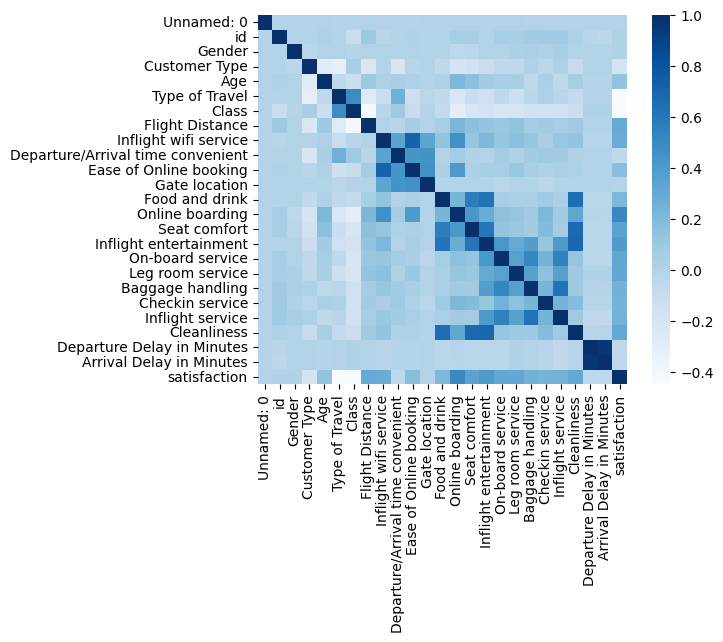

In [109]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

# Step 4 | Spliting and Normalization

Converting the data to arrys instead of DF

In [119]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']

In [120]:
## Train: 50%, Validation: 25%, Test: 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, 
                                                    random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, 
                                                  random_state=42, stratify=y_train)

In [121]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## MLP


In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32, 16), random_state=42)

In [123]:
y_val_pred = mlp.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 94.76%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14720
           1       0.94      0.94      0.94     11256

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [124]:
y_test_pred = mlp.predict(X_test)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(classification_report(y_test, y_test_pred))


Test Accuracy: 94.84%
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14720
           1       0.94      0.94      0.94     11256

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



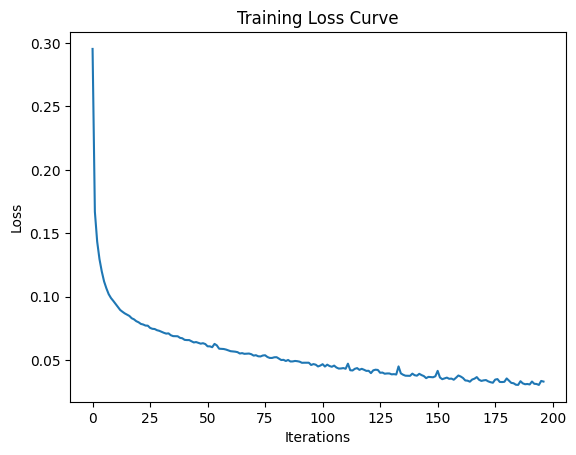

In [125]:
# Plot training loss curve
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

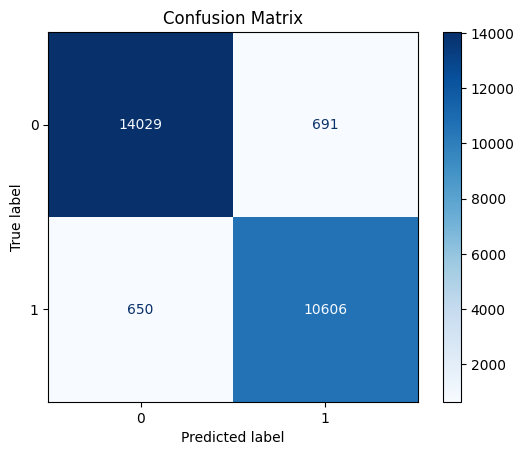

In [126]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

label_encoders = {}
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['satisfaction'].classes_)

# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [127]:
from scipy.stats import ks_2samp

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(y_test, y_test_pred)
print(f'KS Statistic: {ks_stat}')
print(f'KS P-Value: {ks_p_value}')

# Interpretation of the KS test
alpha = 0.05
if ks_p_value < alpha:
    print("The distributions of the predicted and actual labels are significantly different.")
else:
    print("The distributions of the predicted and actual labels are not significantly different.")


KS Statistic: 0.0015783800431167228
KS P-Value: 0.9999999999999993
The distributions of the predicted and actual labels are not significantly different.
